In [12]:
# This file is aimed to add Xe to the model and see if the model can be improved
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Propocessing

This part will generate a file with following parts
* Keff
* Power
* Threshold
* Histogramed Cs
* Histogramed Xe

In [13]:
core_name = 'cycle_352.csv' 
Gamma_name = "Quantile_1_cycle_32_bins_10.csv"


output_name = 'HxF_90pow.csv'

offset = 35
shuffle = False

In [14]:
# First, get the keff power and threshold from tracked_results.csv

core_file = pd.read_csv("./Reprocessed HxF Data/90_ power/HxF_HTR10_90pow_core_state_targets.csv")
core_file.shape

(605, 2)

In [15]:
core_file.head

<bound method NDFrame.head of      Unnamed: 0      keff
0             0  1.006297
1             1  1.006939
2             2  1.006987
3             3  1.009508
4             4  1.010824
..          ...       ...
600         600  1.018860
601         601  1.017346
602         602  1.018312
603         603  1.017847
604         604  1.017209

[605 rows x 2 columns]>

In [16]:
extract_columns = ["keff"]
core_data = core_file[extract_columns].to_numpy()
core_data.shape

(605, 1)

In [17]:
Gamma_data = pd.read_csv(f"./Reprocessed HxF Data/90_ power/HxF_HTR10_90pow_average_actual_concentrations_features.csv").to_numpy()

In [18]:
Gamma_data.shape

(605, 321)

In [19]:
# do the time align
# although it does not have a clear effect on the result






core_data = core_data[offset:]

Gamma_data = Gamma_data[:-offset]

In [20]:

total_data = np.concatenate((core_data, Gamma_data), axis=1)
total_data.shape

(570, 322)

In [21]:
# check if the first column is the keff

total_data[:,0]

array([1.01979885, 1.01995225, 1.01938481, 1.01735005, 1.01802158,
       1.01765049, 1.01801603, 1.0172868 , 1.01702941, 1.01667649,
       1.01528313, 1.01652685, 1.01611658, 1.01520147, 1.01453761,
       1.01512766, 1.01490272, 1.01480778, 1.01490599, 1.0158035 ,
       1.01629744, 1.01682819, 1.01625967, 1.01677246, 1.01824513,
       1.01874368, 1.01862733, 1.02088976, 1.01975064, 1.02066214,
       1.02050597, 1.02151609, 1.02227524, 1.02289461, 1.02174714,
       1.02088327, 1.02155837, 1.02163333, 1.02116801, 1.02068532,
       1.02110079, 1.02278488, 1.02200548, 1.02134444, 1.02085203,
       1.02048697, 1.02171982, 1.02134424, 1.01948818, 1.02008677,
       1.02014729, 1.01941543, 1.01928732, 1.01919743, 1.0188336 ,
       1.01773995, 1.01774647, 1.01828505, 1.01748116, 1.01807465,
       1.01679393, 1.01695695, 1.01790424, 1.01920114, 1.01815947,
       1.01753553, 1.01725322, 1.01738549, 1.01700867, 1.01825144,
       1.01837153, 1.01777738, 1.01832733, 1.01798496, 1.01786

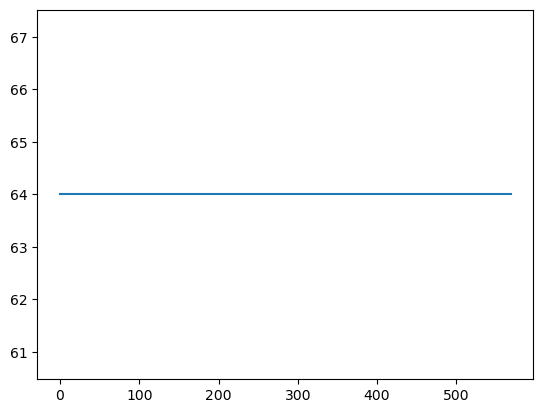

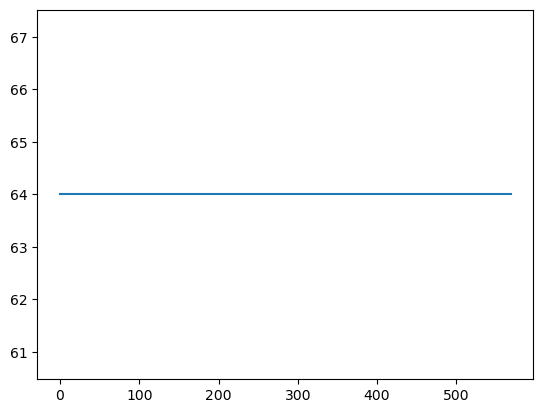

In [22]:
# check the power and threshold

plt.plot(total_data[:,-1])
plt.figure()
plt.plot(total_data[:,-1])

In [23]:
def shuffle_ndarray(arr, chunk_size=10):
    num_chunks = arr.shape[0] // chunk_size  # 计算块的数量

    # 将数组切片为长度为 chunk_size 的块
    chunks = np.split(arr[:num_chunks*chunk_size], num_chunks)

    # 对块的索引进行洗牌（shuffle）
    shuffled_indices = np.arange(num_chunks)
    np.random.shuffle(shuffled_indices)

    # 根据洗牌后的索引重新排序块
    shuffled_chunks = [chunks[i] for i in shuffled_indices]

    # 将洗牌后的块重新合并为一个数组
    shuffled_arr = np.concatenate(shuffled_chunks)

    return shuffled_arr


if shuffle:

    total_data = shuffle_ndarray(total_data, 50)

In [24]:
# Drop the data 

# Save the array as a CSV file
np.savetxt(f'./HxF Data/{output_name}', total_data, delimiter=',')
np.savetxt(f'./Processed Data/{output_name}', total_data, delimiter=',')